In [ ]:
import os
import csv

DirCovid = r"C:\\Users\\asus\\Downloads\\seg_data16sr\\seg_data16sr\\positive"
DirNonCovid = r"C:\\Users\\asus\\Downloads\\seg_data16sr\\seg_data16sr\\negative"

FileLocation = []
FileName = []
for root, dir_name, file_name in os.walk(DirCovid): 
    for name in file_name:
        FileLocation.append(os.path.join(root, name))
        FileName.append(name)
        
for root, dir_name, file_name in os.walk(DirNonCovid): 
    for name in file_name:
        FileLocation.append(os.path.join(root, name))
        FileName.append(name)
                
with open('mfcc2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    headerList = ["FileName","Status"]
    csv.DictWriter(csvfile, delimiter=',',fieldnames=headerList).writeheader()
    for name in FileName:
        writer.writerow([name,"Covid"])
    for name in FileName:
        writer.writerow([name,"Non-Covid"])




In [ ]:
import pandas as pd
import os
import librosa

audio_dataset_path=r"C:\\Users\\asus\\Downloads\\seg_data16sr\\seg_data16sr\\all"
metadata=pd.read_csv (r"C:\\Users\\asus\\Downloads\\minor code\\coughdataset\\newmfcc2.csv")
metadata.head()

FileNotFoundError: ignored

In [ ]:

def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["FileName"]))
    final_class_labels=row["Status"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1882it [02:46, 11.32it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','corona_test'])
extracted_features_df.head()

,feature,corona_test
0,"[-1109.2283, 5.6909633, -4.3914094, 2.92813, -...",Covid
1,"[-601.4879, 62.74279, -71.83314, 86.28924, -49...",Covid
2,"[-643.25684, 124.871086, -53.615955, 41.385952...",Covid
3,"[-364.84286, 68.06273, -4.579537, 93.7206, -29...",Covid
4,"[-544.8134, 69.37885, 2.8263512, 66.01771, -2....",Covid


In [ ]:

### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['corona_test'].tolist())

In [ ]:

### Label Encoding
y=np.array(pd.get_dummies(y))

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:

import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.3))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.3))


###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_47 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_48 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 100)             

In [ ]:
model.compile( loss='mse',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 40

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

hist=model.fit(X_train, y_train, batch_size=num_batch_size,  epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0631 - accuracy: 0.9176 - val_loss: 0.1196 - val_accuracy: 0.8488

Epoch 00001: val_loss improved from inf to 0.11960, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0598 - accuracy: 0.9203 - val_loss: 0.1159 - val_accuracy: 0.8462

Epoch 00002: val_loss improved from 0.11960 to 0.11588, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0551 - accuracy: 0.9282 - val_loss: 0.1168 - val_accuracy: 0.8435

Epoch 00003: val_loss did not improve from 0.11588
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0590 - accuracy: 0.9229 - val_loss: 0.1211 - val_accuracy: 0.8329

Epoch 00004: val_loss did not improve from 0.11588
Epoch 5/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0621 - accuracy: 0.9183 - val_loss: 

38/38 [==============================] - 0s 8ms/step - loss: 0.0570 - accuracy: 0.9243 - val_loss: 0.1240 - val_accuracy: 0.8382

Epoch 00042: val_loss did not improve from 0.11334
Epoch 43/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0563 - accuracy: 0.9236 - val_loss: 0.1146 - val_accuracy: 0.8541

Epoch 00043: val_loss did not improve from 0.11334
Epoch 44/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0574 - accuracy: 0.9282 - val_loss: 0.1189 - val_accuracy: 0.8541

Epoch 00044: val_loss did not improve from 0.11334
Epoch 45/100
38/38 [==============================] - 0s 7ms/step - loss: 0.0546 - accuracy: 0.9236 - val_loss: 0.1105 - val_accuracy: 0.8488

Epoch 00045: val_loss improved from 0.11334 to 0.11045, saving model to saved_models\audio_classification.hdf5
Epoch 46/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0590 - accuracy: 0.9196 - val_loss: 0.1138 - val_accuracy: 0.8355

Epoch 00046: val_loss did not impr

38/38 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.95 - 0s 8ms/step - loss: 0.0409 - accuracy: 0.9508 - val_loss: 0.1342 - val_accuracy: 0.8249

Epoch 00083: val_loss did not improve from 0.10632
Epoch 84/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0421 - accuracy: 0.9449 - val_loss: 0.1250 - val_accuracy: 0.8329

Epoch 00084: val_loss did not improve from 0.10632
Epoch 85/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0451 - accuracy: 0.9442 - val_loss: 0.1169 - val_accuracy: 0.8541

Epoch 00085: val_loss did not improve from 0.10632
Epoch 86/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0443 - accuracy: 0.9435 - val_loss: 0.1202 - val_accuracy: 0.8488

Epoch 00086: val_loss did not improve from 0.10632
Epoch 87/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0430 - accuracy: 0.9442 - val_loss: 0.1250 - val_accuracy: 0.8382

Epoch 00087: val_loss did not improve from 0.10632
E

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
p

0.8461538553237915


In [ ]:
hist.history??

In [ ]:
import matplotlib.pyplot as plt



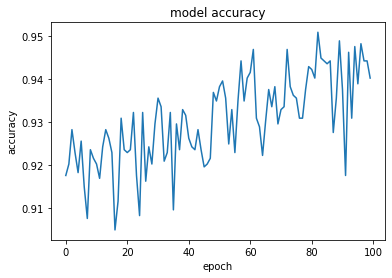

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

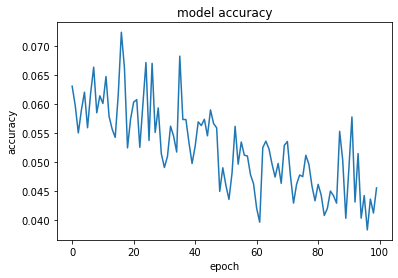

In [ ]:
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()